# King County Real Estate 


# The Data
***

# Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

The `address`, `lat`, and `long` fields have been retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). In some cases due to missing or incorrectly-entered data from the King County Assessor, this API returned locations outside of King County, WA. If you plan to use the `address`, `lat`, or `long` fields in your modeling, consider identifying outliers prior to including the values in your model.


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [2]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
# Look at Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


### Target is price, let's see what's correlated to price

In [5]:
 df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.608521
sqft_above       0.538651
bathrooms        0.480401
sqft_patio       0.313409
bedrooms         0.289204
sqft_garage      0.264169
sqft_basement    0.245058
floors           0.180576
yr_built         0.096013
sqft_lot         0.085730
yr_renovated     0.084786
lat              0.063632
long            -0.022509
id              -0.034184
Name: price, dtype: float64

## Baseline Model
***

I will use sqft_living as my factor for my baseline model because it is relevent to the business problem and has the highest correlation with the target variable, price. 

In [6]:
#baseline model
import statsmodels.api as sm
y = df["price"]
X_baseline = df[["sqft_living"]]
model_results = sm.OLS(y, sm.add_constant(X_baseline)).fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:11:50   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is significant overall. The model explains 37% of the variance in price. 
The constant and coefficient are both significant. 
The model shows that for every sqare foot in living area, the price goes up by about $560. 


Overall, I don't think this is a very good model because it only explains 37% of the variance. 

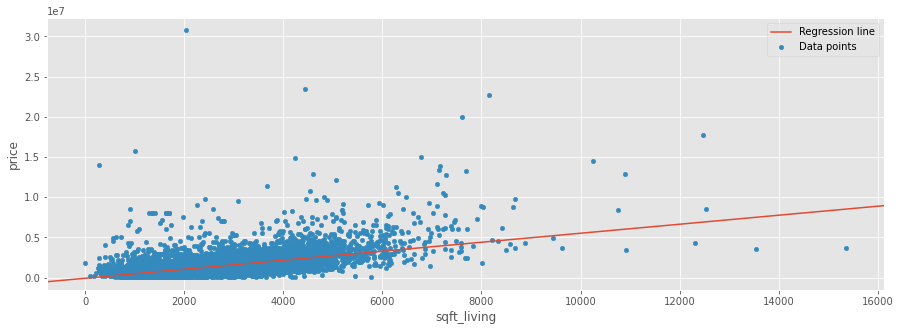

In [7]:
# Plot the model fit (scatter plot and regression line)

fig, ax = plt.subplots(figsize=(15,5))
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results = model_results, label="Regression line", ax=ax)
ax.legend();

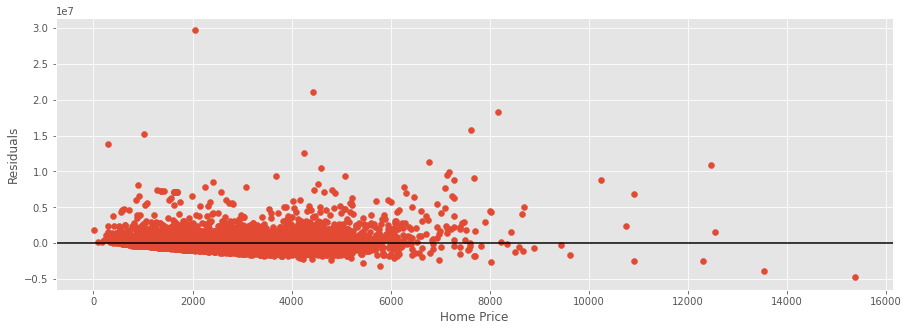

In [8]:
# Plot the model residuals
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(df["sqft_living"], model_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("Home Price")
ax.set_ylabel("Residuals");

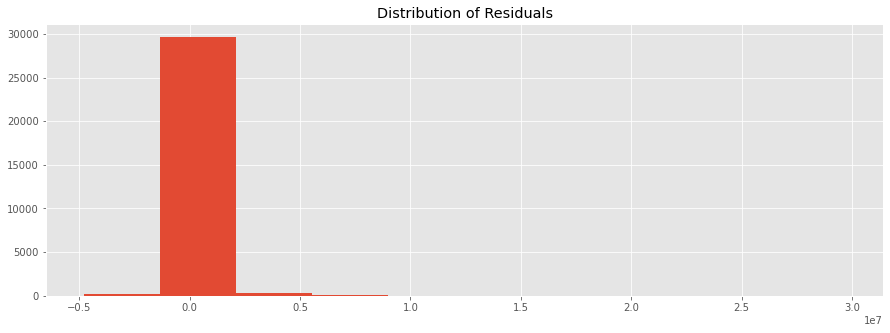

In [9]:
# Plotting residual histogram
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(model_results.resid)
ax.set_title("Distribution of Residuals");

## Adding numerical factors: Bedrooms and Bathrooms

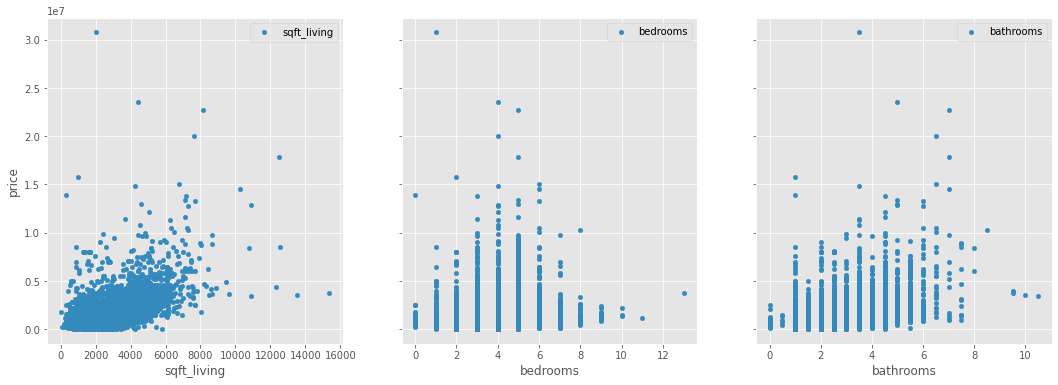

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18,6))
for idx, channel in enumerate(["sqft_living", "bedrooms", "bathrooms"]):
    df.plot(kind="scatter", x=channel, y="price", ax=axs[idx], label=channel)
    axs[idx].legend()

### Second Model: Sqare foot living, Bedrooms, and Bathrooms

In [11]:
y = df["price"]
X = df[["sqft_living", "bedrooms", "bathrooms"]]
model_results = sm.OLS(y, sm.add_constant(X)).fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     6388.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:11:52   Log-Likelihood:            -4.4868e+05
No. Observations:               30155   AIC:                         8.974e+05
Df Residuals:                   30151   BIC:                         8.974e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.017e+05   1.51e+04     13.331      0.000    1.72e+05    2.31e+05
sqft_living   616.1460      6.986     88.201      0.000     602.454     629.838
bedrooms    -1.624e+05   5446.419    -29.824      0.000   -1.73e+05   -1.52e+05
bathrooms    6.841e+04   7291.402      9.383      0.000    5.41e+04    8.27e+04
==============================================================================
Omnibus:                    43114.610   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46323274.951
Skew:                           8.067   Prob(JB):                         0.00
Kurtosis:                     194.332   Cond. No.                     9.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

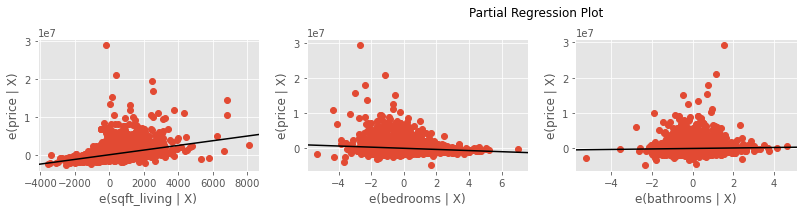

In [12]:
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(
    model_results,
    exog_idx=list(X.columns.values),
    grid=(6,4),
    fig=fig)
plt.show()

## Adding categorical data using one-hot encoding: Grade, Condition, View

### Grade

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [13]:
df.groupby("grade")["price"].mean().sort_values(ascending=False)

grade
13 Mansion       7.399048e+06
12 Luxury        5.088029e+06
11 Excellent     3.542308e+06
10 Very Good     2.341987e+06
9 Better         1.586307e+06
1 Cabin          1.352500e+06
8 Good           1.083520e+06
7 Average        8.201276e+05
6 Low Average    6.539746e+05
4 Low            6.388057e+05
5 Fair           6.186138e+05
3 Poor           4.644615e+05
2 Substandard    3.025000e+05
Name: price, dtype: float64

I would probably drop cabin as it's the most inferior and is most likely not what the clients would be looking for. 

In [14]:
df.grade.describe()

count         30155
unique           13
top       7 Average
freq          11697
Name: grade, dtype: object

### Condition

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

In [15]:
df.groupby("condition")["price"].mean().sort_values(ascending=False)

condition
Average      1.134336e+06
Very Good    1.130726e+06
Good         1.053242e+06
Fair         7.799337e+05
Poor         6.482829e+05
Name: price, dtype: float64

drop poor

### View

Quality of view from house
Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other

In [16]:
df.groupby("view")["price"].mean().sort_values(ascending=False)

view
EXCELLENT    2.994147e+06
FAIR         1.742069e+06
GOOD         1.736416e+06
AVERAGE      1.451993e+06
NONE         1.018607e+06
Name: price, dtype: float64

drop None

### Create new data frame in order to one hot encode

In [17]:
#make copy of data to manipulate and call it king for King county
king = df[["price","grade", "condition", "view", "sqft_living", "bedrooms", "bathrooms"]]

In [18]:
#one hot encoding
king = pd.get_dummies(king)
king.head()

,price,sqft_living,bedrooms,bathrooms,grade_1 Cabin,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,...,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,675000.0,1180,4,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,920000.0,2770,5,2.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,311000.0,2880,6,2.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,775000.0,2160,3,3.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,592500.0,1120,2,2.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [19]:
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                30155 non-null  float64
 1   sqft_living          30155 non-null  int64  
 2   bedrooms             30155 non-null  int64  
 3   bathrooms            30155 non-null  float64
 4   grade_1 Cabin        30155 non-null  uint8  
 5   grade_10 Very Good   30155 non-null  uint8  
 6   grade_11 Excellent   30155 non-null  uint8  
 7   grade_12 Luxury      30155 non-null  uint8  
 8   grade_13 Mansion     30155 non-null  uint8  
 9   grade_2 Substandard  30155 non-null  uint8  
 10  grade_3 Poor         30155 non-null  uint8  
 11  grade_4 Low          30155 non-null  uint8  
 12  grade_5 Fair         30155 non-null  uint8  
 13  grade_6 Low Average  30155 non-null  uint8  
 14  grade_7 Average      30155 non-null  uint8  
 15  grade_8 Good         30155 non-null 

In [20]:
#Drop baseline rows so to avoid dummy variable trap
king.drop(["grade_1 Cabin", "condition_Poor", "view_NONE"], axis=1, inplace=True)

In [21]:
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                30155 non-null  float64
 1   sqft_living          30155 non-null  int64  
 2   bedrooms             30155 non-null  int64  
 3   bathrooms            30155 non-null  float64
 4   grade_10 Very Good   30155 non-null  uint8  
 5   grade_11 Excellent   30155 non-null  uint8  
 6   grade_12 Luxury      30155 non-null  uint8  
 7   grade_13 Mansion     30155 non-null  uint8  
 8   grade_2 Substandard  30155 non-null  uint8  
 9   grade_3 Poor         30155 non-null  uint8  
 10  grade_4 Low          30155 non-null  uint8  
 11  grade_5 Fair         30155 non-null  uint8  
 12  grade_6 Low Average  30155 non-null  uint8  
 13  grade_7 Average      30155 non-null  uint8  
 14  grade_8 Good         30155 non-null  uint8  
 15  grade_9 Better       30155 non-null 

### Model including both categorical and numerical columns

In [22]:
y = king["price"]
X = king.drop(["price"], axis=1)
model_results = sm.OLS(y, sm.add_constant(X)).fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:11:53   Log-Likelihood:            -4.4573e+05
No. Observations:               30155   AIC:                         8.915e+05
Df Residuals:                   30131   BIC:                         8.917e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.226e+06   4.58e+05      2.680      0.007    3.29e+05    2.12e+06
sqft_living           292.2632      7.871     37.130      0.000     276.835     307.691
bedrooms            -4.538e+04   5259.665     -8.628      0.000   -5.57e+04   -3.51e+04
bathrooms            4.927e+04   6962.224      7.077      0.000    3.56e+04    6.29e+04
grade_10 Very Good  -1.068e+05   4.51e+05     -0.237      0.813   -9.91e+05    7.77e+05
grade_11 Excellent   7.157e+05   4.52e+05      1.583      0.113    -1.7e+05     1.6e+06
grade_12 Luxury      1.769e+06   4.55e+05      3.888      0.000    8.77e+05    2.66e+06
grade_13 Mansion     3.348e+06   4.71e+05      7.109      0.000    2.43e+06    4.27e+06
grade_2 Substandard  -1.14e+06   6.37e+05     -1.790      0.074   -2.39e+06    1.09e+05
grade_3 Poor        -1.153e+06   4.85e+05     -2.376      0.017    -2.1e+06   -2.02e+05
grade_4 Low         -9.352e+05   4.59e+05     -2.038      0.042   -1.83e+06   -3.59e+04
grade_5 Fair        -9.482e+05   4.51e+05     -2.101      0.036   -1.83e+06   -6.37e+04
grade_6 Low Average -9.605e+05    4.5e+05     -2.133      0.033   -1.84e+06   -7.77e+04
grade_7 Average     -9.406e+05    4.5e+05     -2.089      0.037   -1.82e+06   -5.79e+04
grade_8 Good         -8.36e+05    4.5e+05     -1.856      0.063   -1.72e+06    4.69e+04
grade_9 Better      -5.518e+05   4.51e+05     -1.225      0.221   -1.44e+06    3.31e+05
condition_Average    2.238e+04   8.25e+04      0.271      0.786   -1.39e+05    1.84e+05
condition_Fair       8502.0079   9.16e+04      0.093      0.926   -1.71e+05    1.88e+05
condition_Good       8.183e+04   8.26e+04      0.991      0.322      -8e+04    2.44e+05
condition_Very Good  1.591e+05    8.3e+04      1.917      0.055   -3606.741    3.22e+05
view_AVERAGE          1.49e+05   1.52e+04      9.787      0.000    1.19e+05    1.79e+05
view_EXCELLENT        1.14e+06   2.81e+04     40.628      0.000    1.08e+06    1.19e+06
view_FAIR            3.379e+05   4.32e+04      7.830      0.000    2.53e+05    4.22e+05
view_GOOD            1.822e+05   2.22e+04      8.213      0.000    1.39e+05    2.26e+05
==============================================================================
Omnibus:                    42100.825   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47020888.621
Skew:                           7.657   Prob(JB):                         0.00
Kurtosis:                     195.844   Cond. No.                     1.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.

In [23]:
model_results.pvalues > 0.05

const                  False
sqft_living            False
bedrooms               False
bathrooms              False
grade_10 Very Good      True
grade_11 Excellent      True
grade_12 Luxury        False
grade_13 Mansion       False
grade_2 Substandard     True
grade_3 Poor           False
grade_4 Low            False
grade_5 Fair           False
grade_6 Low Average    False
grade_7 Average        False
grade_8 Good            True
grade_9 Better          True
condition_Average       True
condition_Fair          True
condition_Good          True
condition_Very Good     True
view_AVERAGE           False
view_EXCELLENT         False
view_FAIR              False
view_GOOD              False
dtype: bool

In [24]:
#  remove outliers
#  #checking for outliers
#  mean = all_vars["bedrooms"].mean()
#  std = all_vars["bedrooms"].std()
#  outliers_high = mean + (3*std)
#  outliers_low = mean - (3*std)
#  print(outliers_low, outliers_high)
#  all_vars = all_vars.loc[(all_vars["bedrooms"] < outliers_high) & (all_vars["bedrooms"] > outliers_low)]

In [25]:
king.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Very Good', 'view_AVERAGE',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD'],
      dtype='object')

In [26]:
#find outliers function
def remove_outliers(column):
    mean = column.mean()
    std = column.std()
    outliers_high = mean + (3*std)
    outliers_low = mean - (3*std)
    return king.loc[(column < outliers_high) & (column > outliers_low)] 

In [27]:
for column in ['price']:
    new_king = remove_outliers(king[column])
new_king.head()

,price,sqft_living,bedrooms,bathrooms,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,...,grade_8 Good,grade_9 Better,condition_Average,condition_Fair,condition_Good,condition_Very Good,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,675000.0,1180,4,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,920000.0,2770,5,2.5,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,311000.0,2880,6,2.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,775000.0,2160,3,3.0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
4,592500.0,1120,2,2.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
new_king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29718 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                29718 non-null  float64
 1   sqft_living          29718 non-null  int64  
 2   bedrooms             29718 non-null  int64  
 3   bathrooms            29718 non-null  float64
 4   grade_10 Very Good   29718 non-null  uint8  
 5   grade_11 Excellent   29718 non-null  uint8  
 6   grade_12 Luxury      29718 non-null  uint8  
 7   grade_13 Mansion     29718 non-null  uint8  
 8   grade_2 Substandard  29718 non-null  uint8  
 9   grade_3 Poor         29718 non-null  uint8  
 10  grade_4 Low          29718 non-null  uint8  
 11  grade_5 Fair         29718 non-null  uint8  
 12  grade_6 Low Average  29718 non-null  uint8  
 13  grade_7 Average      29718 non-null  uint8  
 14  grade_8 Good         29718 non-null  uint8  
 15  grade_9 Better       29718 non-null 

In [29]:
y = new_king["price"]
X = new_king.drop(["price"], axis=1)
model_results = sm.OLS(y, sm.add_constant(X)).fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     1348.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:11:53   Log-Likelihood:            -4.2684e+05
No. Observations:               29718   AIC:                         8.537e+05
Df Residuals:                   29694   BIC:                         8.539e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.14e+06   3.01e+05      3.784      0.000     5.5e+05    1.73e+06
sqft_living           237.8280      5.353     44.433      0.000     227.337     248.319
bedrooms            -1.313e+04   3514.466     -3.735      0.000      -2e+04   -6237.062
bathrooms            1.632e+04   4659.582      3.503      0.000    7191.174    2.55e+04
grade_10 Very Good  -4.485e+04   2.97e+05     -0.151      0.880   -6.27e+05    5.37e+05
grade_11 Excellent   1.528e+05   2.98e+05      0.513      0.608   -4.31e+05    7.37e+05
grade_12 Luxury      2.346e+05   3.02e+05      0.776      0.438   -3.58e+05    8.27e+05
grade_13 Mansion    -4.382e+05   3.64e+05     -1.204      0.228   -1.15e+06    2.75e+05
grade_2 Substandard -1.074e+06   4.19e+05     -2.561      0.010    -1.9e+06   -2.52e+05
grade_3 Poor        -9.798e+05   3.19e+05     -3.067      0.002   -1.61e+06   -3.54e+05
grade_4 Low         -8.999e+05   3.02e+05     -2.979      0.003   -1.49e+06   -3.08e+05
grade_5 Fair         -9.23e+05   2.97e+05     -3.107      0.002   -1.51e+06   -3.41e+05
grade_6 Low Average -9.451e+05   2.96e+05     -3.188      0.001   -1.53e+06   -3.64e+05
grade_7 Average     -8.749e+05   2.96e+05     -2.951      0.003   -1.46e+06   -2.94e+05
grade_8 Good        -7.426e+05   2.96e+05     -2.505      0.012   -1.32e+06   -1.62e+05
grade_9 Better      -4.369e+05   2.97e+05     -1.473      0.141   -1.02e+06    1.44e+05
condition_Average    9.306e+04   5.47e+04      1.700      0.089   -1.42e+04       2e+05
condition_Fair       1.277e+05   6.07e+04      2.105      0.035    8774.422    2.47e+05
condition_Good       1.641e+05   5.48e+04      2.995      0.003    5.67e+04    2.72e+05
condition_Very Good  2.488e+05   5.51e+04      4.515      0.000    1.41e+05    3.57e+05
view_AVERAGE         1.209e+05   1.02e+04     11.887      0.000    1.01e+05    1.41e+05
view_EXCELLENT       4.799e+05   2.04e+04     23.515      0.000     4.4e+05     5.2e+05
view_FAIR            2.223e+05   2.95e+04      7.542      0.000    1.65e+05     2.8e+05
view_GOOD            1.637e+05    1.5e+04     10.930      0.000    1.34e+05    1.93e+05
==============================================================================
Omnibus:                     6263.836   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25393.030
Skew:                           0.998   Prob(JB):                         0.00
Kurtosis:                       7.065   Cond. No.                     1.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"

In [30]:
model_results.pvalues > 0.05

const                  False
sqft_living            False
bedrooms               False
bathrooms              False
grade_10 Very Good      True
grade_11 Excellent      True
grade_12 Luxury         True
grade_13 Mansion        True
grade_2 Substandard    False
grade_3 Poor           False
grade_4 Low            False
grade_5 Fair           False
grade_6 Low Average    False
grade_7 Average        False
grade_8 Good           False
grade_9 Better          True
condition_Average       True
condition_Fair         False
condition_Good         False
condition_Very Good    False
view_AVERAGE           False
view_EXCELLENT         False
view_FAIR              False
view_GOOD              False
dtype: bool

In [33]:
#model dropping columns whose pvalues is greater than alpha 0.05
y = new_king["price"]
X = new_king.drop(["price", "grade_10 Very Good", "grade_11 Excellent", 
                   "grade_12 Luxury", "grade_9 Better", "condition_Average"], axis=1)
model_results = sm.OLS(y, sm.add_constant(X)).fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     1597.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:13:59   Log-Likelihood:            -4.2741e+05
No. Observations:               29718   AIC:                         8.549e+05
Df Residuals:                   29699   BIC:                         8.550e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.276e+05   1.45e+04     56.881      0.000    7.99e+05    8.56e+05
sqft_living           289.9672      5.205     55.714      0.000     279.766     300.168
bedrooms            -3.056e+04   3537.461     -8.638      0.000   -3.75e+04   -2.36e+04
bathrooms            1.709e+04   4746.426      3.602      0.000    7791.721    2.64e+04
grade_13 Mansion    -3.226e+05   2.14e+05     -1.508      0.132   -7.42e+05    9.68e+04
grade_2 Substandard -7.321e+05   3.02e+05     -2.422      0.015   -1.32e+06    -1.4e+05
grade_3 Poor         -6.42e+05   1.19e+05     -5.398      0.000   -8.75e+05   -4.09e+05
grade_4 Low         -5.155e+05   6.15e+04     -8.387      0.000   -6.36e+05   -3.95e+05
grade_5 Fair        -5.329e+05   2.41e+04    -22.091      0.000    -5.8e+05   -4.86e+05
grade_6 Low Average -5.561e+05   1.28e+04    -43.551      0.000   -5.81e+05   -5.31e+05
grade_7 Average     -5.026e+05   9207.851    -54.584      0.000   -5.21e+05   -4.85e+05
grade_8 Good        -3.932e+05   8197.434    -47.961      0.000   -4.09e+05   -3.77e+05
condition_Fair       3.727e+04   2.86e+04      1.303      0.193   -1.88e+04    9.33e+04
condition_Good       6.937e+04   5869.169     11.820      0.000    5.79e+04    8.09e+04
condition_Very Good  1.508e+05   8301.657     18.169      0.000    1.35e+05    1.67e+05
view_AVERAGE         1.206e+05   1.04e+04     11.632      0.000       1e+05    1.41e+05
view_EXCELLENT       5.026e+05   2.08e+04     24.187      0.000    4.62e+05    5.43e+05
view_FAIR            2.331e+05      3e+04      7.762      0.000    1.74e+05    2.92e+05
view_GOOD            1.826e+05   1.53e+04     11.975      0.000    1.53e+05    2.13e+05
==============================================================================
Omnibus:                     5976.103   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21965.633
Skew:                           0.981   Prob(JB):                         0.00
Kurtosis:                       6.727   Cond. No.                     2.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

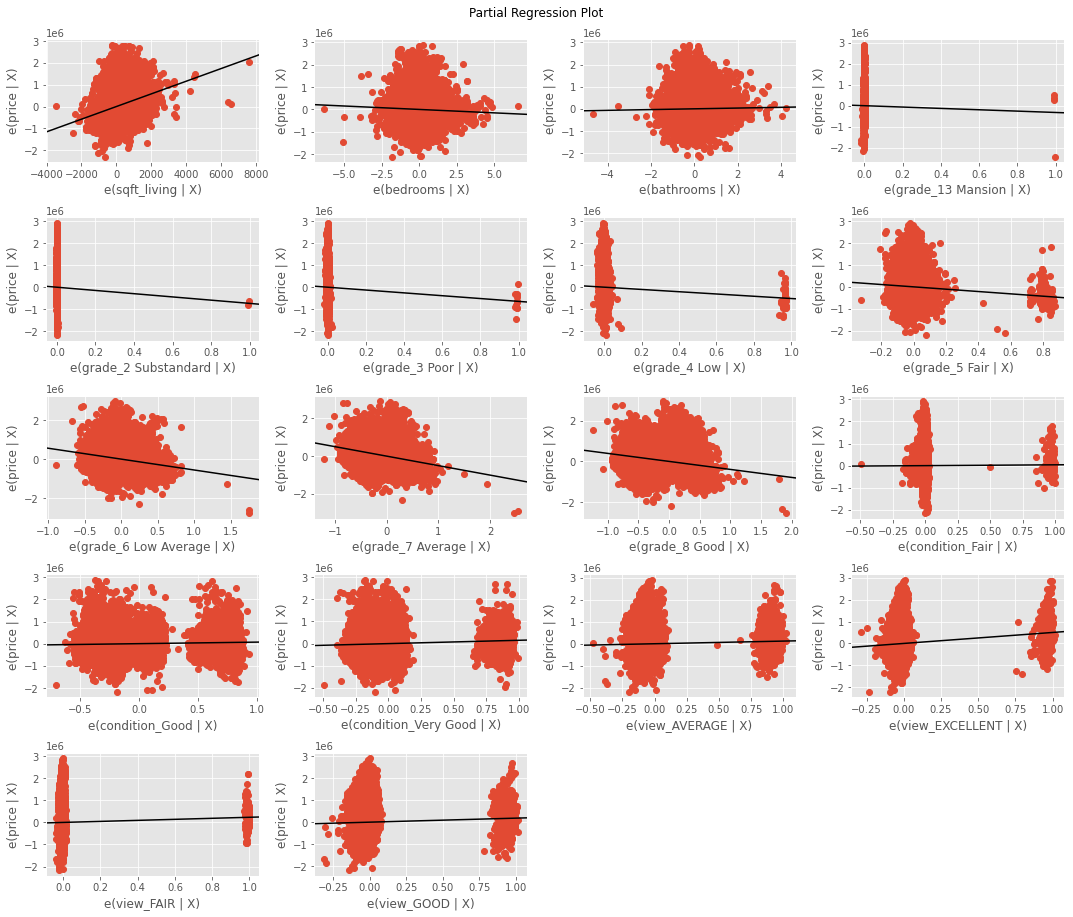

In [34]:
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(
    model_results,
    exog_idx=list(X.columns.values),
    grid=(6,4),
    fig=fig)
plt.show()

#### Homoscedasticity